#  Decision Trees

In [30]:
# Initial imports
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Loading and Preprocessing Loans Encoded Data

In [31]:
# Loading data
file_path = "C:/Users/VivoBook/Desktop/Classwork/capstoneproject-2022/Database/county_year_merged.csv"
county_year_merged = pd.read_csv(file_path)
county_year_merged.head()

,county,year,number_sales,sales_percentage,population,pop_percentage,county_count,state_count,total_incentives,county_max,state_max,total_max
0,Alameda,2015,5536,8.65,1630159,4.19,0,6,6,0,25500,25500
1,Alameda,2016,5327,7.35,1647332,4.21,0,6,6,0,25500,25500
2,Alameda,2017,7056,7.61,1659750,4.22,0,6,6,0,25500,25500
3,Alameda,2018,12578,8.12,1669659,4.23,2,6,8,5800,25500,31300
4,Alameda,2019,11781,8.05,1678926,4.25,4,6,10,15307,25500,40807


In [32]:
county_year_merged.dtypes

county               object
year                  int64
number_sales          int64
sales_percentage    float64
population            int64
pop_percentage      float64
county_count          int64
state_count           int64
total_incentives      int64
county_max            int64
state_max             int64
total_max             int64
dtype: object

In [33]:
# Use OneHotEncoder to transform cetegorical data (county)
from sklearn.preprocessing import OneHotEncoder

# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# reshaped = np.array(counties).reshape(-1,1)

# transform data
ohc = encoder.fit_transform(county_year_merged[["county"]])
counties_df = pd.DataFrame(ohc)
counties_df.columns = encoder.get_feature_names(["county"])
counties_df

C:\Users\VivoBook\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,county_Alameda,county_Alpine,county_Amador,county_Butte,county_Calaveras,county_Colusa,county_Contra Costa,county_Del Norte,county_El Dorado,county_Fresno,...,county_Sonoma,county_Stanislaus,county_Sutter,county_Tehama,county_Trinity,county_Tulare,county_Tuolumne,county_Ventura,county_Yolo,county_Yuba
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
# Merge ohc and county_year_merged, drop categorical "county"
ohc_merged = pd.merge(counties_df, county_year_merged, left_index=True, right_index=True).sort_values(by=["county", "year"], axis=0, ascending=True).reset_index(level=None, drop=True, inplace=False)
ohc_merged = ohc_merged.drop(columns=["county", "sales_percentage"], axis=1)
ohc_merged

,county_Alameda,county_Alpine,county_Amador,county_Butte,county_Calaveras,county_Colusa,county_Contra Costa,county_Del Norte,county_El Dorado,county_Fresno,...,year,number_sales,population,pop_percentage,county_count,state_count,total_incentives,county_max,state_max,total_max
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2015,5536,1630159,4.19,0,6,6,0,25500,25500
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2016,5327,1647332,4.21,0,6,6,0,25500,25500
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2017,7056,1659750,4.22,0,6,6,0,25500,25500
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2018,12578,1669659,4.23,2,6,8,5800,25500,31300
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2019,11781,1678926,4.25,4,6,10,15307,25500,40807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2018,41,79043,0.20,0,6,6,0,25500,25500
448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2019,59,80250,0.20,0,6,6,0,25500,25500
449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020,63,81468,0.21,0,9,9,0,27000,27000
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021,125,82091,0.21,0,9,9,0,27000,27000


In [35]:
# Define features set
X = ohc_merged.drop("number_sales", axis=1)
y = ohc_merged["number_sales"]

In [36]:
# Split into Train and Test sets, StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=75, train_size=0.80)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(361, 67)
(91, 67)
(361,)
(91,)


## Fitting the Random Forest Model

In [38]:
# Create and fit the random forest regressor instance
rf_model = RandomForestRegressor(random_state=75, n_estimators=500).fit(X_train_scaled, y_train)

## Making Predictions Using the Data

In [39]:
# Making predictions using the testing data
y_pred = rf_model.predict(X_test_scaled)
print(f"Training Data Score: {rf_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9878898686314347
Testing Data Score: 0.7919971706239508


## Rank Importance of Features

In [40]:
# Calculate feature importance in the Random Forest model.
feature_importances = rf_model.feature_importances_
feature_importances

array([2.89468715e-02, 3.84642230e-09, 2.83450883e-08, 4.97320070e-06,
       1.56260370e-07, 5.44008738e-09, 1.73324976e-03, 7.00791576e-09,
       5.91979461e-05, 1.72573616e-04, 1.26583030e-08, 5.53896626e-06,
       3.26248867e-07, 1.45585436e-06, 3.25319421e-04, 1.36615240e-05,
       1.36882221e-07, 5.69147110e-08, 3.51914193e-02, 1.04393010e-05,
       1.82472611e-04, 3.68756029e-07, 1.67082783e-06, 4.12964354e-06,
       9.06507129e-08, 8.92283158e-06, 1.97101586e-04, 3.81654420e-05,
       9.98614692e-06, 1.94098925e-01, 4.13831674e-04, 2.19092182e-06,
       1.00446184e-02, 1.08882832e-03, 4.16842015e-06, 2.34870982e-03,
       5.46172554e-02, 4.54143399e-04, 1.75063763e-03, 1.81905977e-04,
       2.43728361e-03, 4.80198238e-04, 1.01020537e-01, 1.36678874e-04,
       5.14265723e-05, 7.96929306e-07, 3.88759815e-07, 8.57500781e-06,
       2.79260511e-04, 2.52739976e-04, 1.51313622e-06, 1.07940375e-06,
       3.35600236e-07, 1.23727758e-05, 5.01545467e-07, 2.14169328e-03,
      

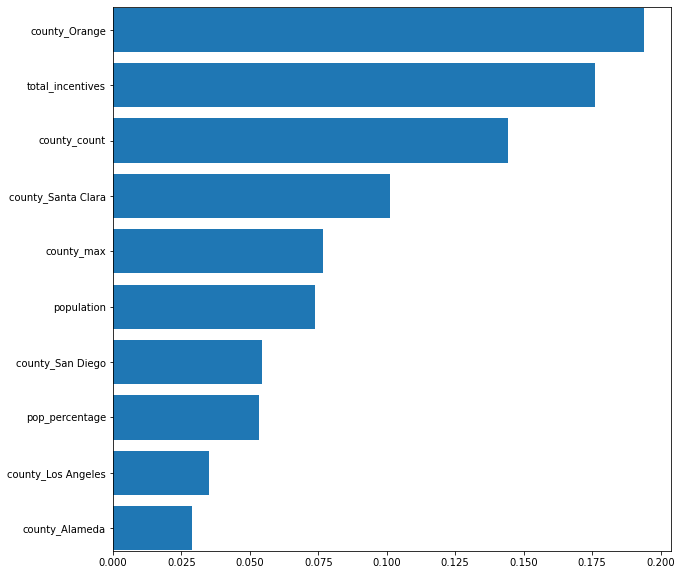

In [41]:
# Use the following code to plot the most important features
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols[-10:], width=width[-10:])

plt.show()

# Visualize regression results

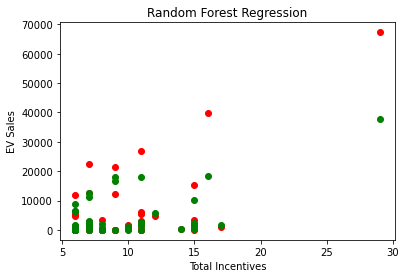

In [42]:
# Visualize model’s predictions for total_incentives
# Real values = red, predicted = green
# Code found here: https://cnvrg.io/random-forest-regression/
plt.scatter(X_test['total_incentives'].values, y_test, color = 'red')
plt.scatter(X_test['total_incentives'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Total Incentives')
plt.ylabel('EV Sales')
plt.show() 

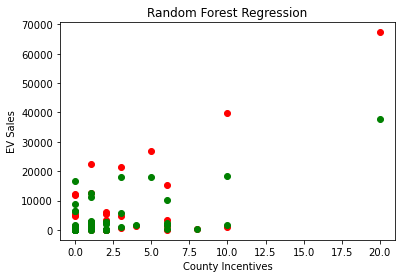

In [43]:
# Visualize model’s predictions for county_count
# Real values = red, predicted = green
plt.scatter(X_test['county_count'].values, y_test, color = 'red')
plt.scatter(X_test['county_count'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('County Incentives')
plt.ylabel('EV Sales')
plt.show() 

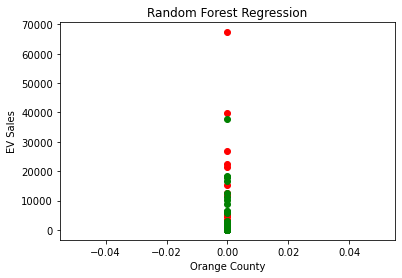

In [44]:
# Visualize model’s predictions for county_Orange
# Real values = red, predicted = green
plt.scatter(X_test['county_Orange'].values, y_test, color = 'red')
plt.scatter(X_test['county_Orange'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Orange County')
plt.ylabel('EV Sales')
plt.show() 

# Make pipeline to preprocess data for stacked predictors

In [17]:
# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
#          Maria Telenczuk    <https://github.com/maikia>
# License: BSD 3 clause

from sklearn.compose import make_column_selector

cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_include=np.number)
cat_selector(X)

[]

In [18]:
num_selector(X)

['county_Alameda',
 'county_Alpine',
 'county_Amador',
 'county_Butte',
 'county_Calaveras',
 'county_Colusa',
 'county_Contra Costa',
 'county_Del Norte',
 'county_El Dorado',
 'county_Fresno',
 'county_Glenn',
 'county_Humboldt',
 'county_Imperial',
 'county_Inyo',
 'county_Kern',
 'county_Kings',
 'county_Lake',
 'county_Lassen',
 'county_Los Angeles',
 'county_Madera',
 'county_Marin',
 'county_Mariposa',
 'county_Mendocino',
 'county_Merced',
 'county_Modoc',
 'county_Mono',
 'county_Monterey',
 'county_Napa',
 'county_Nevada',
 'county_Orange',
 'county_Placer',
 'county_Plumas',
 'county_Riverside',
 'county_Sacramento',
 'county_San Benito',
 'county_San Bernardino',
 'county_San Diego',
 'county_San Francisco',
 'county_San Joaquin',
 'county_San Luis Obispo',
 'county_San Mateo',
 'county_Santa Barbara',
 'county_Santa Clara',
 'county_Santa Cruz',
 'county_Shasta',
 'county_Sierra',
 'county_Siskiyou',
 'county_Solano',
 'county_Sonoma',
 'county_Stanislaus',
 'county_Sutter

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder

cat_tree_processor = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
num_tree_processor = SimpleImputer(strategy="mean", add_indicator=True)

tree_preprocessor = make_column_transformer(
    (num_tree_processor, num_selector), (cat_tree_processor, cat_selector)
)
tree_preprocessor

ColumnTransformer(transformers=[('simpleimputer',
                                 SimpleImputer(add_indicator=True),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE4EB64D08>),
                                ('ordinalencoder',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE4ECBE708>)])

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

cat_linear_processor = OneHotEncoder(handle_unknown="ignore")
num_linear_processor = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
)

linear_preprocessor = make_column_transformer(
    (num_linear_processor, num_selector), (cat_linear_processor, cat_selector)
)
linear_preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer(add_indicator=True))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE4EB64D08>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE4ECBE708>)])

# Stack predictors on dataset

In [21]:
from sklearn.linear_model import LassoCV

lasso_pipeline = make_pipeline(linear_preprocessor, LassoCV())
lasso_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(add_indicator=True))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE4EB64D08>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE4ECBE708>)])),
                ('lassocv', LassoCV())])

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = make_pipeline(tree_preprocessor, RandomForestRegressor(random_state=42))
rf_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE4EB64D08>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE4ECBE708>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [23]:
from sklearn.ensemble import HistGradientBoostingRegressor

gbdt_pipeline = make_pipeline(
    tree_preprocessor, HistGradientBoostingRegressor(random_state=0)
)
gbdt_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE4EB64D08>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE4ECBE708>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(random_state=0))])

In [24]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

estimators = [
    ("Random Forest", rf_pipeline),
    ("Lasso", lasso_pipeline),
    ("Gradient Boosting", gbdt_pipeline),
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())
stacking_regressor

StackingRegressor(estimators=[('Random Forest',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('simpleimputer',
                                                                                 SimpleImputer(add_indicator=True),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE4EB64D08>),
                                                                                ('ordinalencoder',
                                                                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                unknown_value=-1),
                                                                                 <sklearn.com...
                                                       

# Measure and plot results

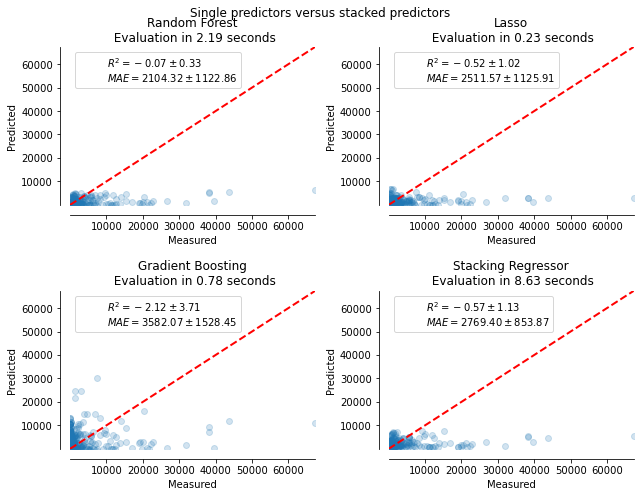

In [25]:
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_predict


def plot_regression_results(ax, y_true, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot(
        [y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "--r", linewidth=2
    )
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel("Measured")
    ax.set_ylabel("Predicted")
    extra = plt.Rectangle(
        (0, 0), 0, 0, fc="w", fill=False, edgecolor="none", linewidth=0
    )
    ax.legend([extra], [scores], loc="upper left")
    title = title + "\n Evaluation in {:.2f} seconds".format(elapsed_time)
    ax.set_title(title)


fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs = np.ravel(axs)

for ax, (name, est) in zip(
    axs, estimators + [("Stacking Regressor", stacking_regressor)]
):
    start_time = time.time()
    score = cross_validate(
        est, X, y, scoring=["r2", "neg_mean_absolute_error"], n_jobs=2, verbose=0
    )
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, X, y, n_jobs=2, verbose=0)

    plot_regression_results(
        ax,
        y,
        y_pred,
        name,
        (r"$R^2={:.2f} \pm {:.2f}$" + "\n" + r"$MAE={:.2f} \pm {:.2f}$").format(
            np.mean(score["test_r2"]),
            np.std(score["test_r2"]),
            -np.mean(score["test_neg_mean_absolute_error"]),
            np.std(score["test_neg_mean_absolute_error"]),
        ),
        elapsed_time,
    )

plt.suptitle("Single predictors versus stacked predictors")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Gradient Booster Regression

In [26]:
# Try for better results based off stacked predictors
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
for i in [0.1, 0.01, 0.001]:
    for j in [100, 250, 500, 750]:
        gbr = GradientBoostingRegressor(learning_rate=i, n_estimators=j)
        gbr = gbr.fit(X_train_scaled, y_train)
        print("predict output for GradientBoostingRegressor: learning_rate={}, n_estimators={}".format(i, j))
        mse = mean_squared_error(y_test, gbr.predict(X_test_scaled))
        print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

        pred2 = gbr.predict(X_test_scaled)
        print("Accuracy on training set: %.3f" % gbr.score(X_train_scaled, y_train))
        print("Accuracy on test set: %.3f" % gbr.score(X_test_scaled, y_test))
        print("==============================================")

predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=100
The mean squared error (MSE) on test set: 17947861.5928
Accuracy on training set: 0.988
Accuracy on test set: 0.788
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=250
The mean squared error (MSE) on test set: 16740795.5451
Accuracy on training set: 0.998
Accuracy on test set: 0.802
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=500
The mean squared error (MSE) on test set: 16283204.2484
Accuracy on training set: 1.000
Accuracy on test set: 0.808
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=750
The mean squared error (MSE) on test set: 15166350.7582
Accuracy on training set: 1.000
Accuracy on test set: 0.821
predict output for GradientBoostingRegressor: learning_rate=0.01, n_estimators=100
The mean squared error (MSE) on test set: 39455602.6430
Accuracy on training set: 0.709
Accuracy on test set: 0.534
predict o

In [27]:
# Check best results in dataframe
X_test.loc[:, ['number_sales']] = pred2
X_test.head()

,county_Alameda,county_Alpine,county_Amador,county_Butte,county_Calaveras,county_Colusa,county_Contra Costa,county_Del Norte,county_El Dorado,county_Fresno,...,year,population,pop_percentage,county_count,state_count,total_incentives,county_max,state_max,total_max,number_sales
416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2019,65312,0.17,8,6,14,9500,25500,35000,1553.588098
434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021,474998,1.21,2,9,11,3000,27000,30000,1553.588098
140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021,31377,0.08,2,9,11,500,27000,27500,1553.588098
118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2015,148525,0.38,0,6,6,0,25500,25500,1553.588098
285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020,64110,0.16,0,9,9,0,27000,27000,3771.526866


In [28]:
# Testing parameters that give best results
gbt = GradientBoostingRegressor(learning_rate=0.1, n_estimators=750)

gbt = gbt.fit(X_train_scaled, y_train)
print("predict output for GradientBoostingRegressor: learning_rate={}, n_estimators={}".format(i, j))
mse = mean_squared_error(y_test, gbt.predict(X_test_scaled))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

pred2 = gbt.predict(X_test_scaled)
print("The best accuracy on training set: %.3f" % gbt.score(X_train_scaled, y_train))
print("The best accuracy on test set: %.3f" % gbt.score(X_test_scaled, y_test))

predict output for GradientBoostingRegressor: learning_rate=0.001, n_estimators=750
The mean squared error (MSE) on test set: 15844227.1880
The best accuracy on training set: 1.000
The best accuracy on test set: 0.813
